In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
data = np.load('../cropped_imgs_fetal_regions.npy')
data.shape

(180, 224, 224, 3)

In [6]:
with open("../manual_annot_CRL_Sagittal.txt", "r") as file:
    # Read the contents of the file
    file_contents = file.read()
lines = file_contents.split('\n')
index = [int(i.split(' ')[0]) for i in lines]
labels = [' '.join(i.split(' ')[1:]) for i in lines]
manual_labels_df = pd.DataFrame()
manual_labels_df['Image ID'] = index
manual_labels_df['label'] = labels

manual_labels_df['label'] = manual_labels_df['label'].apply(lambda x: x.strip())

manual_labels_df = manual_labels_df[manual_labels_df['label'] != 'remove']

num_labels = {'head': 0, 'neck': 1, 'body': 2}

manual_labels_df['encoded_label'] = manual_labels_df['label'].map(num_labels)

y = np.array(manual_labels_df['encoded_label'])

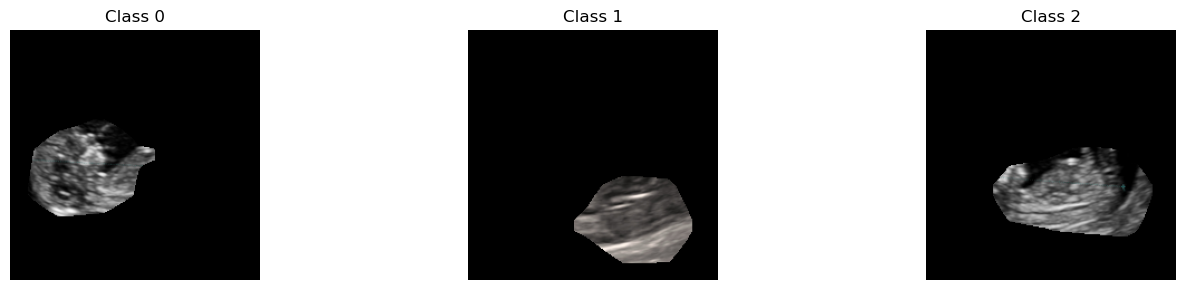

In [8]:
unique_labels = np.unique(y)

    # Create a subplot
    num_classes = len(unique_labels)
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

    # Iterate over each unique label
    for i, label in enumerate(unique_labels):
        # Find the first image with this label
        idx = np.where(y == label)[0][0]
        image = data[idx]

        # Plot the image
        axes[i].imshow(image)
        axes[i].set_title(f"Class {label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [59]:
def canny_edge_detectors(img):
    # Convert to graycsale
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img, (3,3), 0) 
    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=0, threshold2=0)
    return edges

In [60]:
data = data.astype('uint8')*255
gray_data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])

In [61]:
edges_cropped = []
for i in data:

    edges_cropped.append(canny_edge_detectors(i))
edges_cropped = np.array(edges_cropped)

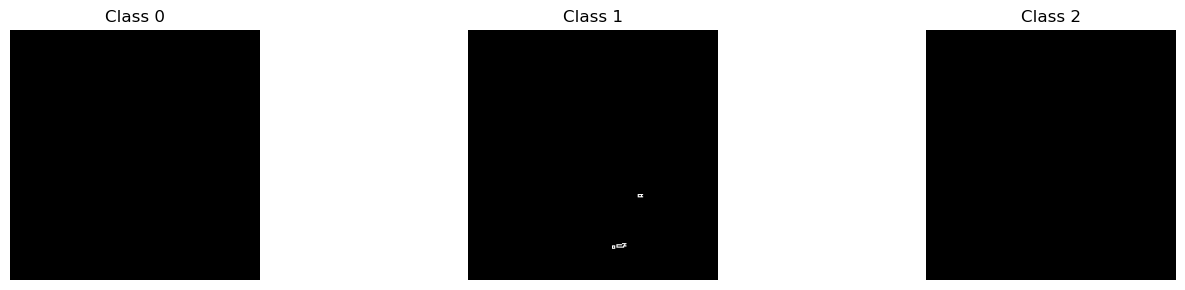

In [62]:
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, label in enumerate(unique_labels):
    idx = np.where(y == label)[0][0]
    image = edges_cropped[idx]
    axes[i].imshow(image, cmap = 'gray')
    axes[i].set_title(f"Class {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([0], dtype=uint8)